In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import multiprocessing as mul
from scipy import stats
import pickle
from scipy.integrate import quad
from corner import corner
import pandas as pd
import dynesty as dyn
from scipy.stats import gaussian_kde

In [2]:
pwd

'/scratch/Project-QG/task2'

In [3]:
GRBs = ['GRB210619B', 'GRB210610B', 'GRB210204A', 'GRB201216C', 'GRB200829A', 'GRB200613A', 'GRB190114C', 'GRB180720B', 'GRB180703A', 'GRB171010A', 'GRB160625B', 'GRB160509A', 'GRB150821A', 'GRB150514A', 'GRB150403A', 'GRB150314A', 'GRB141028A', 'GRB140508A', 'GRB140206A', 'GRB131231A', 'GRB131108A', 'GRB130925A', 'GRB130518A', 'GRB130427A', 'GRB120119A', 'GRB100728A', 'GRB091003A', 'GRB090926A', 'GRB090618', 'GRB090328', 'GRB081221', 'GRB080916C']

In [4]:
ncpu = 12
grbparam = pd.read_csv(os.getcwd() + '/../data/GRBPARAM.csv', index_col=0)

param_ranges_NULL = [(1e-20, 5000), (-3, 10), (-10, 3), (0, 3), (0, 4)]
param_range_lin = [(1e-20, 1e20), (1e-20, 5000), (-3, 10), (-10, 3), (0, 3), (0, 4)]
param_range_quad = [(1e-20, 1e15), (1e-20, 5000), (-3, 10), (-10, 3), (0, 3), (0, 4)]

#### Agarwal Null Hypo error

$\quad \dfrac{d\Delta t_{int}}{dE} = (1 + z)\tau\dfrac{E}{keV}^{\alpha - 1}$


#### L.I.V error

$\quad \dfrac{d\Delta t_{LIV}}{dE} = -\dfrac{1 + n}{2H_0}\cdot\dfrac{n E^{n-1}}{E_{QG}^{n}} {\huge \int}  _{0}^{z} \quad \dfrac{\left(1+z^{\prime}\right)^{n} d z^{\prime}}{\sqrt{\Omega_{\mathrm{m}}\left(1+z^{\prime}\right)^{3}+\Omega_{\Lambda}}}$


#### Total error
$\quad \dfrac{d(\Delta t_{int} + \Delta t_{LIV})}{dE}$


5035it [00:22, 219.42it/s, +512 | bound: 38 | nc: 1 | ncall: 88892 | eff(%):  6.276 | loglstar:   -inf < -29.999 <    inf | logz: -37.487 +/-  0.110 | dlogz:  0.000 >  0.100]
6863it [00:33, 203.23it/s, +512 | bound: 62 | nc: 1 | ncall: 136375 | eff(%):  5.428 | loglstar:   -inf < -26.524 <    inf | logz: -37.594 +/-  0.131 | dlogz:  0.000 >  0.100]
7961it [00:39, 201.27it/s, +512 | bound: 74 | nc: 1 | ncall: 161065 | eff(%):  5.277 | loglstar:   -inf < -21.563 <    inf | logz: -34.764 +/-  0.149 | dlogz:  0.000 >  0.100]


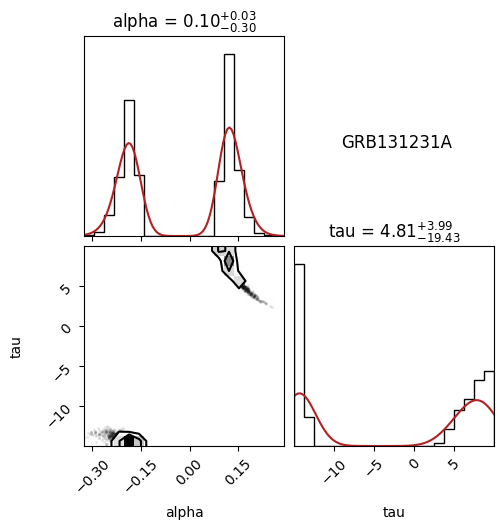

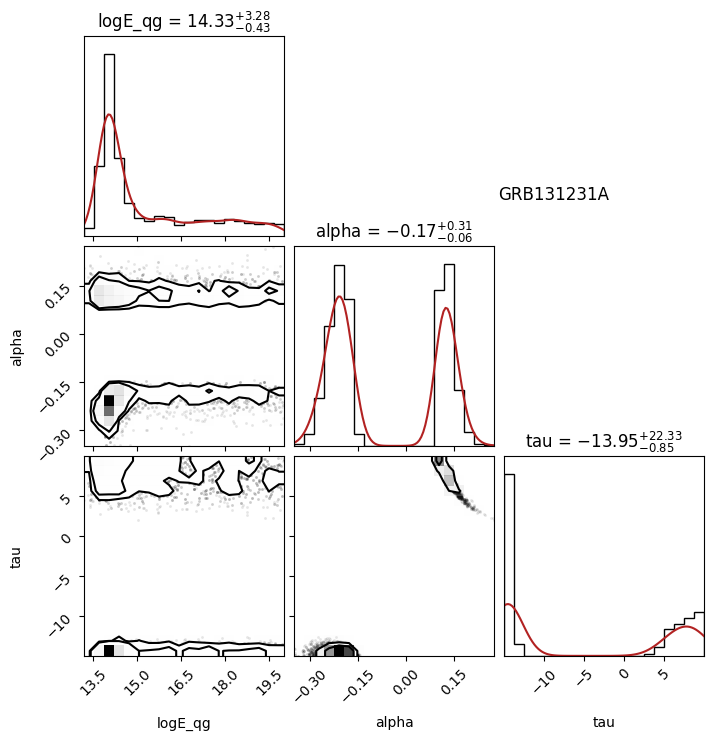

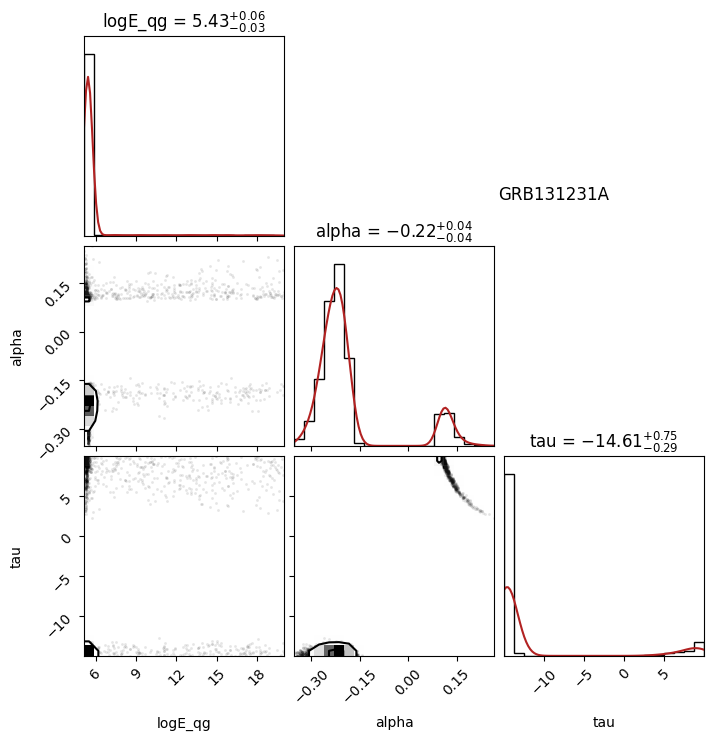

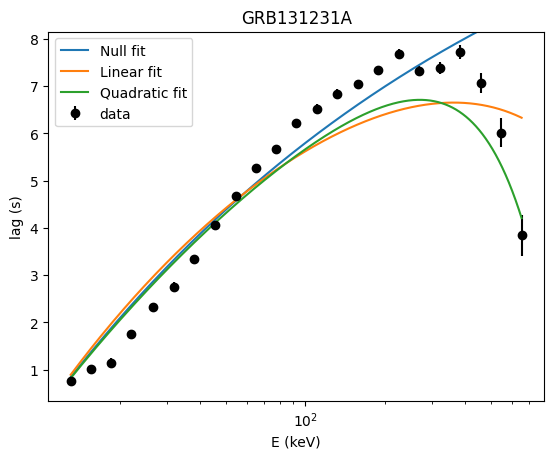

Bayes factor for null model:  -37.486606334963255 +/- 0.13733359260648303
Bayes factor for linear LIV model:  -37.59406115629157 +/- 0.15775708548398418
Bayes factor for quadratic LIV model:  -34.76381076692105 +/- 0.18145640743581662
GRB131231A 0.5760784146423512 0.6925934869747887 1.3596190127706174


8369it [00:42, 197.89it/s, +512 | bound: 79 | nc: 1 | ncall: 163928 | eff(%):  5.435 | loglstar:   -inf < -66.667 <    inf | logz: -80.653 +/-  0.159 | dlogz:  0.000 >  0.100]
9094it [00:47, 190.37it/s, +512 | bound: 90 | nc: 1 | ncall: 187821 | eff(%):  5.128 | loglstar:   -inf <  8.725 <    inf | logz: -6.682 +/-  0.166 | dlogz:  0.000 >  0.100]
8938it [00:47, 188.00it/s, +512 | bound: 90 | nc: 1 | ncall: 184076 | eff(%):  5.148 | loglstar:   -inf <  9.413 <    inf | logz: -5.689 +/-  0.164 | dlogz:  0.000 >  0.100]


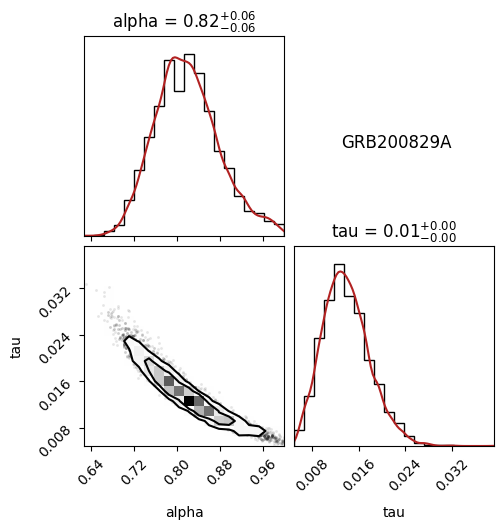

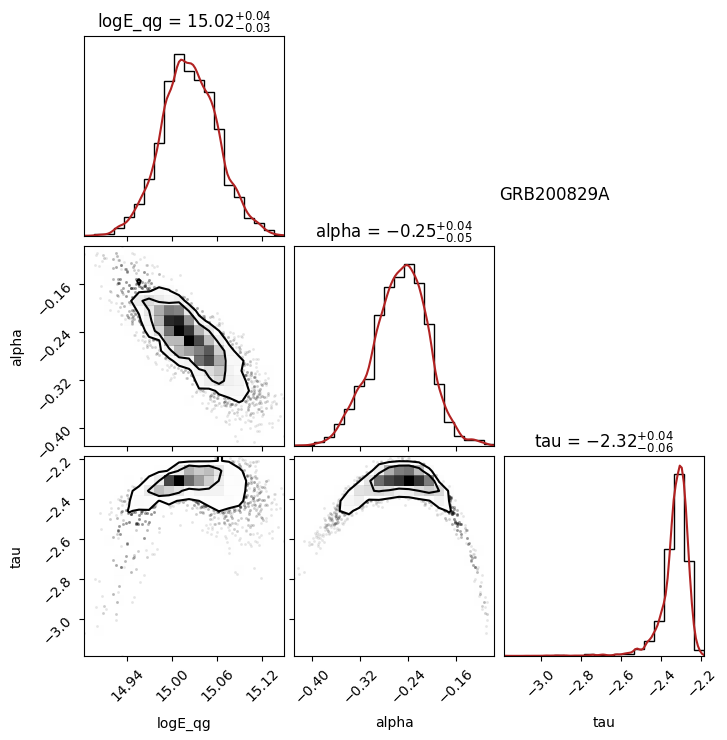

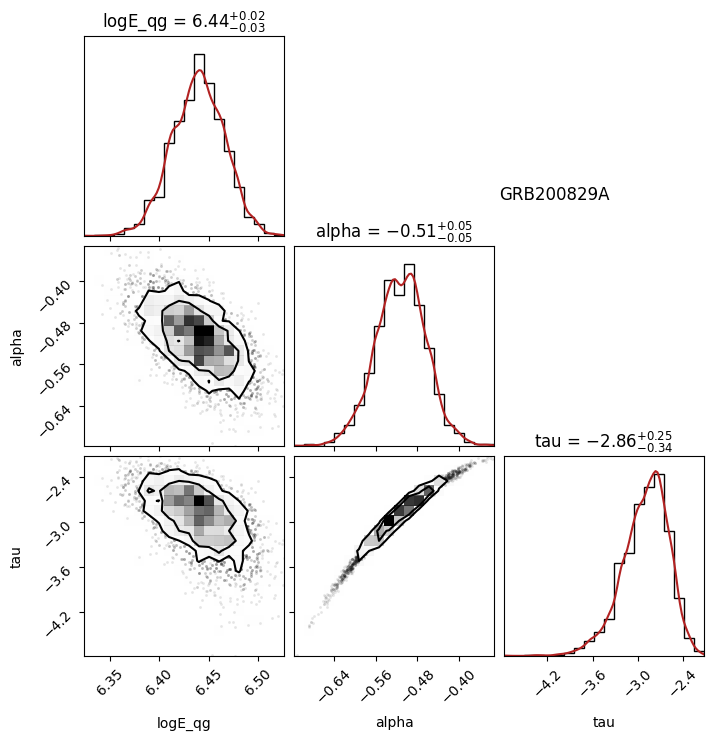

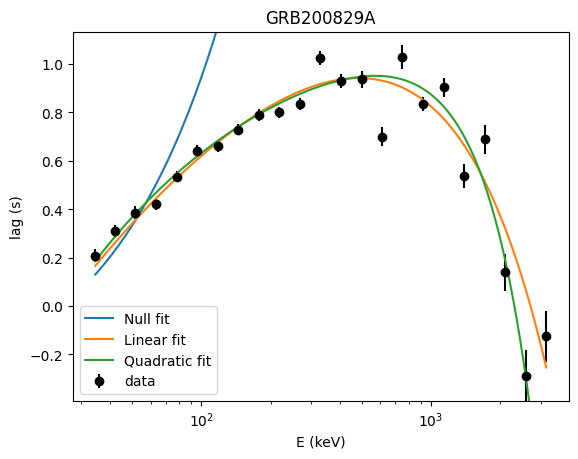

Bayes factor for null model:  -80.65297006438513 +/- 0.1968185562806025
Bayes factor for linear LIV model:  -6.68188789845571 +/- 0.20421855492576804
Bayes factor for quadratic LIV model:  -5.689352670443047 +/- 0.20184891939815483
GRB200829A 5.425278955296026 4.227550180999115 4.066587754374749


In [5]:
for grb in ['GRB131231A', 'GRB200829A']:
    
    grbname = grb + '.txt'
    grbname_wtht_ext = grbname.replace('.txt','')
    grbparam = pd.read_csv('../data/GRBPARAM.csv', index_col=0)

    arr = np.loadtxt('../data/asciidataof_fig1/32lag/'+grbname)
    data = [arr[:,0], arr[:,1], arr[:,2]]
    x = arr[:,0]
    y = arr[:,1]
    yerr = arr[:,2]
    df = pd.read_csv('../data/32lag_err/' + grb + '.txt', sep='\s+', header=None, names=['E_obs', 'E_obs_err', 'lag', 'lag_err'])
    E_err = df['E_obs_err'].values

    #Properties of GRB
    E0 = grbparam[grbname.replace('.txt','')].E0
    E0rest = E0
    Erest = arr[:,0]    #in keV
    z_com = grbparam[grbname.replace('.txt','')].redshift #redshift
    H0=67.36 #Hubble constant km -1 Mpc s -1
    omega_m = 0.315
    omega_l = 1 - omega_m

    lin_conv_fac = 3.0856 * 10**13
    quad_conv_fac = 3.0856 * 10**7

    def nullhp(E, alpha, tau):
        return (1 + z_com)*(tau * ((E ** alpha) - (E0 ** alpha)))
            


    def int_z(z_prime, n):
        integ_fn = lambda z: (1+z)**n / np.sqrt(omega_m * (1+z)**3 + omega_l)
        return quad( integ_fn, a=0, b=z_prime)[0]

    int_z1 = np.asarray(int_z(z_com, 1))
    int_z2 = np.asarray(int_z(z_com, 2))

    #LINEAR model
    def linearhp(E, logEqg, alpha, tau):
        
        e0qg = (E - E0) / (10 ** logEqg)
        
        return -1*(lin_conv_fac * e0qg * int_z1)/H0 + nullhp(E, alpha, tau)

    #QUADRATIC model
    def quadhp(E, logEqg, alpha, tau):
        e0qg = (E**2 - E0 **2) / ((10 ** logEqg)**2)
        
        return -1.5 * (quad_conv_fac * e0qg * int_z2)/H0 + nullhp(E, alpha, tau)

    
    ### DERIVATIVES
    
    #NULL MODEL
    def ddeltatdE_int(E, alpha, tau):
        uncertainity_int = (1 + z_com)*(tau * alpha* (E ** (alpha - 1)))
        return uncertainity_int * nullhp(E, alpha, tau)

    #LINEAR MODEL
    def ddeltatdE_LIV_lin(E, logEqg, alpha, tau):
        de0qg = 1 / (10 ** logEqg)
        null_err = ddeltatdE_int(E, alpha, tau)
        
        uncertainity_LIV = (lin_conv_fac * de0qg * int_z1)/H0
        
        return -uncertainity_LIV + null_err

    #QUADRATIC MODEL
    def ddeltatdE_LIV_quad(E, logEqg, alpha, tau):
        de0qg = 2 * E / ((10 ** logEqg)**2)
        
        null_err = ddeltatdE_int(E, alpha, tau)
        uncertainity_LIV = 1.5*(quad_conv_fac * de0qg * int_z2)/H0
        
        return -uncertainity_LIV + null_err
    
    
    #LOG-LIKELIHOODS
    def loglike_null(theta):
        alpha, tau = theta
        err = np.sqrt(yerr**2 + (ddeltatdE_int(x, alpha, tau) * E_err)**2)
        
        model = nullhp(x,  alpha, tau)
        
        return sum(stats.norm.logpdf(*args) for args in zip(y,model,err))
        
        

    def loglike_linear(theta):
        logEqg, alpha, tau = theta
        err = np.sqrt(yerr**2 + (ddeltatdE_LIV_lin(x, logEqg, alpha, tau) * E_err)**2)
        
        model = linearhp(x, logEqg, alpha, tau)
        
        return sum(stats.norm.logpdf(*args) for args in zip(y,model,err))

    def loglike_quad(theta):
        logEqg, alpha, tau = theta
        err = np.sqrt(yerr**2 + (ddeltatdE_LIV_quad(x, logEqg, alpha, tau) * E_err)**2)
        
        model = quadhp(x, logEqg, alpha, tau)
        
        return sum(stats.norm.logpdf(*args) for args in zip(y,model,err))


    #PRIORS

    alphamin = -2
    alphamax = 1
    taumin = -15
    taumax = 10
    logeqmin = 0
    logeqmax = 20


    #PRIOR DISTRIBUTIONS

    def prior_transform_null(theta):
        alpha, tau = theta
        return [(alphamax - alphamin) * alpha + alphamin, (taumax - taumin) * tau + taumin]

    def prior_transform_linear(theta):
        logEqg, alpha, tau = theta
        return [(logeqmax - logeqmin) * logEqg + logeqmin, (alphamax - alphamin) * alpha + alphamin, (taumax - taumin) * tau + taumin]

    def prior_transform_quadratic(theta):
        logEqg, alpha, tau = theta
        return [(logeqmax - logeqmin) * logEqg + logeqmin, (alphamax - alphamin) * alpha + alphamin, (taumax - taumin) * tau + taumin]
    #agarwal22:

    nlive = 512

    with dyn.pool.Pool(ncpu, loglike_null, prior_transform_null) as pool0:
        sampler0 = dyn.NestedSampler(loglike_null, prior_transform_null, ndim=2, nlive = nlive, sample='rwalk', bound='multi', pool=pool0)
        sampler0.run_nested(dlogz=0.1)
        # sampler0.save(os.getcwd() + '/outputs/sampler_saves/' + grbname_wtht_ext + '_null_sampler.dill', store_samples=True)


    with dyn.pool.Pool(ncpu, loglike_linear, prior_transform_linear) as pool1:
        sampler1 = dyn.NestedSampler(loglike_linear, prior_transform_linear, ndim=3, nlive = nlive, sample='rwalk', bound='multi', pool=pool1)
        sampler1.run_nested(dlogz=0.1)


    with dyn.pool.Pool(ncpu, loglike_quad, prior_transform_quadratic) as pool2:
        sampler2 = dyn.NestedSampler(loglike_quad, prior_transform_quadratic, ndim=3, nlive = nlive, sample='rwalk', bound='multi', pool=pool2)
        sampler2.run_nested(dlogz=0.1)


    results0 = sampler0.results
    results1 = sampler1.results
    results2 = sampler2.results


    def smooth_plot(results, figname, labels=["logE_qg", 'alpha', 'tau']):
            weights = np.exp(results.logwt - results.logz[-1])
            samples = dyn.utils.resample_equal(  results.samples, weights)
            
            fig = corner(samples, weights=weights, labels=labels, levels=[0.68, 0.9], show_titles=True, title_kwargs={"fontsize": 12}, hist_kwargs={'density': True})
            ndim =samples.shape[1]
            for axidx, samps in zip([i*(ndim+1) for i in range(ndim)],samples.T):
                kde = gaussian_kde(samps)
                xvals = fig.axes[axidx].get_xlim()
                xvals = np.linspace(xvals[0], xvals[1], 100)
                fig.axes[axidx].plot(xvals, kde(xvals), color='firebrick')
                
            # plt.title(str(grb) + '\n\n')
            plt.suptitle(str(grb) + '\n\n', x=0.75, y=0.75)
            plt.savefig(os.getcwd() + '/outputs/contours_xerr/' + grb + '_' + figname + '_xerr.png')


    smooth_plot(results0, 'nullhp', labels=["alpha", 'tau'])


    smooth_plot(results1, 'linearhp')


    smooth_plot(results2, 'quadhp')


    #PLOTTING FITS

    nplot = 1000
    E = np.linspace(min(Erest), max(Erest), nplot)
    samples0 = dyn.utils.resample_equal( results0.samples, np.exp(results0.logwt - results0.logz[-1]))
    # samples0 = np.median(samples0, axis=0)
    samples0 = samples0[np.argmax(results0.logl)]

    samples1 = dyn.utils.resample_equal( results1.samples, np.exp(results1.logwt - results1.logz[-1]))
    # samples1 = np.median(samples1, axis=0)
    samples1 = samples1[np.argmax(results1.logl)]

    samples2 = dyn.utils.resample_equal( results2.samples, np.exp(results2.logwt - results2.logz[-1]))
    # samples2 = np.median(samples2, axis=0)
    samples2 = samples2[np.argmax(results2.logl)]
    null_fit = [nullhp(E[i], samples0[0], samples0[1]) for i in range(nplot)]
    liv_lin_fit = [linearhp(E[i], samples1[0], samples1[1], samples1[2]) for i in range(nplot)]
    liv_quad_fit = [quadhp(E[i], samples2[0], samples2[1], samples2[2]) for i in range(nplot)]

    plt.figure()
    plt.errorbar(x, y, yerr, fmt='o', color='black', label='data')
    plt.plot(E, null_fit, label='Null fit')
    plt.plot(E, liv_lin_fit,label='Linear fit')
    plt.plot(E, liv_quad_fit, label='Quadratic fit')
    plt.xscale('log')
    # plt.yscale('log')
    plt.ylim(min(y) - max(abs(yerr)), max(y) + max(abs(yerr)))
    # plt.ylim(-200, 20)
    plt.legend()
    plt.xlabel('E (keV)')
    plt.ylabel('lag (s)')
    plt.title(grbname_wtht_ext)
    plt.savefig(os.getcwd() + '/outputs/fits_xerr/' + grbname_wtht_ext + '_fit_logE_xerr.png', facecolor='white')
    plt.show()

    # bayes_factor_lin = np.exp(results1.logz[-1] - results0.logz[-1])
    # bayes_factor_quad = np.exp(results2.logz[-1] - results0.logz[-1])

    print('Bayes factor for null model: ', results0.logz[-1], '+/-', results0.logzerr[-1])
    print('Bayes factor for linear LIV model: ', results1.logz[-1], '+/-', results1.logzerr[-1])
    print('Bayes factor for quadratic LIV model: ', results2.logz[-1], '+/-', results2.logzerr[-1])

    with open('outputs/BF_xerr/' + grb + '_results.txt', 'w') as f:
        f.write(str(results0.logz[-1]) + ',' + str(results0.logzerr[-1]) + '\n')
        f.write(str(results1.logz[-1]) + ',' + str(results1.logzerr[-1]) + '\n')
        f.write(str(results2.logz[-1]) + ',' + str(results2.logzerr[-1]) + '\n')
        
    f.close()
    f = []


    dyn.utils.save_sampler(sampler0, 'outputs/sampler_saves_xerr/' + grb + '_null_sampler.pkl')
    dyn.utils.save_sampler(sampler1, 'outputs/sampler_saves_xerr/' + grb + '_linear_sampler.pkl')
    dyn.utils.save_sampler(sampler2, 'outputs/sampler_saves_xerr/' + grb + '_quadratic_sampler.pkl')
    


    def chi2_all_hypo(E, E_err, y, yerr, n, alpha, tau, logEqg = 0):
        
        if n == 0:
            err = np.sqrt(yerr**2 + (ddeltatdE_int(E, alpha, tau) * E_err)**2)
            return np.sum(((y - nullhp(E, alpha, tau))/err)**2)/(len(y) - 2)
        
        elif n == 1:
            err = np.sqrt(yerr**2 + (ddeltatdE_LIV_lin(E, logEqg, alpha, tau) * E_err)**2)
        
            return np.sum(((y - linearhp(E, logEqg, alpha, tau))/err)**2)/(len(y) - 3)
        
        elif n == 2:
            err = np.sqrt(yerr**2 + (ddeltatdE_LIV_quad(E, logEqg, alpha, tau) * E_err)**2)
            
            return np.sum(((y - quadhp(E, logEqg, alpha, tau))/err)**2)/(len(y) - 3)    
    #Properties of GRB
    E0 = grbparam[grbname.replace('.txt','')].E0
    E0rest = E0
    Erest = arr[:,0]    #in keV
    z_com = grbparam[grbname.replace('.txt','')].redshift #redshift
    threesamplers = ['_null_sampler.pkl', '_linear_sampler.pkl', '_quadratic_sampler.pkl']
    sampler0 = dyn.utils.restore_sampler('./outputs/sampler_saves_xerr/' + grb + threesamplers[0])
    sampler1 = dyn.utils.restore_sampler('./outputs/sampler_saves_xerr/' + grb + threesamplers[1])
    sampler2 = dyn.utils.restore_sampler('./outputs/sampler_saves_xerr/' + grb + threesamplers[2])
    results0 = sampler0.results
    results1 = sampler1.results
    results2 = sampler2.results

    nplot = 1000
    E = np.linspace(min(Erest), max(Erest), nplot)
    samples0 = dyn.utils.resample_equal( results0.samples, np.exp(results0.logwt - results0.logz[-1]))
    # samples0 = np.median(samples0, axis=0)
    samples0 = samples0[np.argmax(results0.logl)]

    samples1 = dyn.utils.resample_equal( results1.samples, np.exp(results1.logwt - results1.logz[-1]))
    # samples1 = np.median(samples1, axis=0)
    samples1 = samples1[np.argmax(results1.logl)]

    samples2 = dyn.utils.resample_equal( results2.samples, np.exp(results2.logwt - results2.logz[-1]))
    # samples2 = np.median(samples2, axis=0)
    samples2 = samples2[np.argmax(results2.logl)]
    null_fit = [nullhp(E[i], samples0[0], samples0[1]) for i in range(nplot)]
    liv_lin_fit = [linearhp(E[i], samples1[0], samples1[1], samples1[2]) for i in range(nplot)]
    liv_quad_fit = [quadhp(E[i], samples2[0], samples2[1], samples2[2]) for i in range(nplot)]
    samples0
    gof_null = chi2_all_hypo(Erest, E_err, y, yerr, 0, samples0[0], samples0[1])
    gof_lin = chi2_all_hypo(Erest, E_err, y, yerr, 1, samples1[1], samples1[2], samples1[0])
    gof_quad = chi2_all_hypo(Erest, E_err, y, yerr, 2, samples2[1], samples2[2], samples2[0])
    print(grb, gof_null, gof_lin, gof_quad)
    
    with open('./outputs/GOF_xerr/' + grb + '_gof.txt', 'w') as f:
        f.write(str(gof_null) + '\n')
        f.write(str(gof_lin) + '\n')
        f.write(str(gof_quad) + '\n')
        
        
    
    f.close()

In [6]:
# nplot = 1000
# E = np.linspace(min(Erest), max(Erest), nplot)

# plt.figure()
# plt.errorbar(Erest, y, yerr, fmt='o', color='black', label='data')
# plt.plot(E, null_fit, label='Null fit')
# plt.plot(E, liv_lin_fit,label='Linear fit', ls='-.', lw = 2.2)
# plt.plot(E, liv_quad_fit, label='Quadratic fit')
# plt.xscale('log')
# # plt.yscale('log')
# plt.ylim(min(y) - max(abs(yerr)), max(y) + max(abs(yerr)))
# # plt.ylim(-200, 20)
# plt.legend()
# plt.xlabel('E (keV)')
# plt.ylabel('lag (s)')
# plt.title(grbname_wtht_ext)
# # plt.savefig(os.getcwd() + '/outputs/fits/' + grbname_wtht_ext + '_fit_logE.png', facecolor='white')
# plt.show()